# Data Analytics - ML25M 

In [38]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)
random.seed(seed)


## Data Acquisition

In [39]:
# Reading the csv files
movies = pd.read_csv('./ml-25m/movies.csv')
ratings = pd.read_csv('./ml-25m/ratings.csv')
tags = pd.read_csv('./ml-25m/tags.csv')
genome_scores = pd.read_csv('./ml-25m/genome-scores.csv')
genome_tags = pd.read_csv('./ml-25m/genome-tags.csv')

In [40]:
# average rating for each movie
grouped_ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()
df = grouped_ratings.merge(movies, on='movieId')

display(df.head())



,movieId,rating,title,genres
0,1,3.893708,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.251527,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.142028,Grumpier Old Men (1995),Comedy|Romance
3,4,2.853547,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.058434,Father of the Bride Part II (1995),Comedy


In [41]:
# Split genres into columns
genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
movies_genres = df.copy()

movies_genres.drop('genres', axis=1, inplace=True)
df.drop('genres', axis=1, inplace=True)
df1= df.copy()
df.head()

,movieId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.893708,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.251527,Jumanji (1995),0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.142028,Grumpier Old Men (1995),0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2.853547,Waiting to Exhale (1995),0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,3.058434,Father of the Bride Part II (1995),0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Merge movies with genome scores
genome_scores['tag'] = genome_scores['tagId'].map(genome_tags.set_index('tagId')['tag'].to_dict())
genome_table = genome_scores.pivot_table(index='movieId', columns='tag', values='relevance')

# Merge movies with genome table
df= pd.merge(df, genome_table, on='movieId')

In [43]:
df.drop(['title','movieId'],axis=1, inplace=True)



In [44]:
df.to_csv('./dataset.csv', index=False)

# Data Visualization

In [45]:
print(f'Number of samples: {df.shape[0]}')
df.describe()

Number of samples: 13816


,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.003257,0.159525,0.109076,0.052258,0.059496,0.347351,0.117834,0.051824,0.477056,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.056980,0.366178,0.311746,0.222555,0.236560,0.476146,0.322424,0.221680,0.499491,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


In [37]:
df.shape

(13816, 1149)

In [9]:
# mean, median, and standard deviation of ratings with two decimal places
print(f'Mean: {df["rating"].mean():.3f}')
print(f'Median: {df["rating"].median():.3f}')
print(f'Standard deviation: {df["rating"].std():.3f}')

Mean: 3.272
Median: 3.340
Standard deviation: 0.484


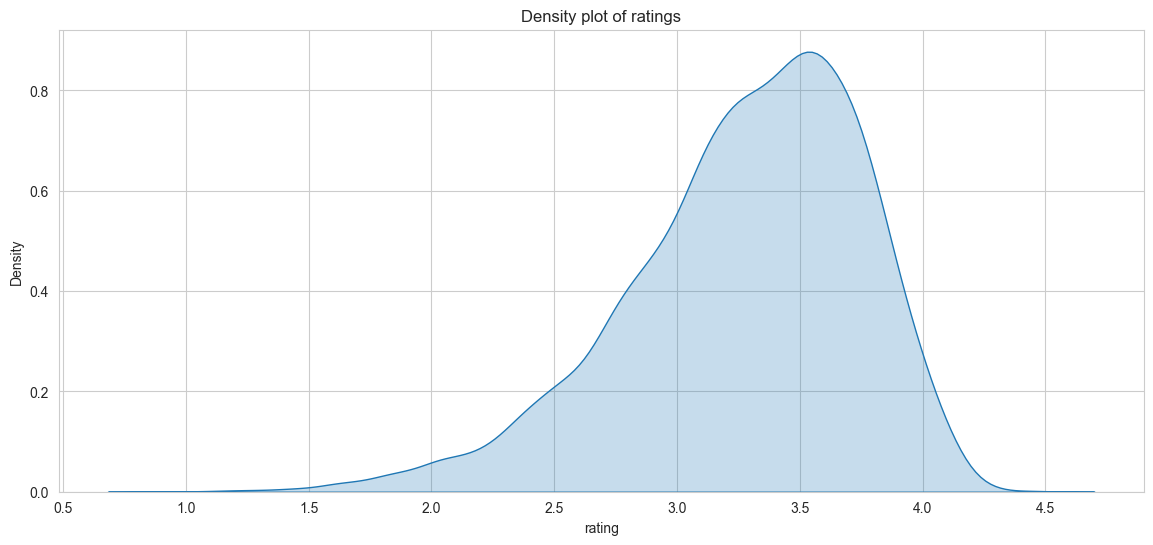

In [10]:
#density plot of ratings
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df['rating'], fill=True)

plt.title('Density plot of ratings')
plt.show()


In [12]:
#loonking for missing values and duplicates
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicates: {df.duplicated().sum()}')


Missing values: 0
Duplicates: 0


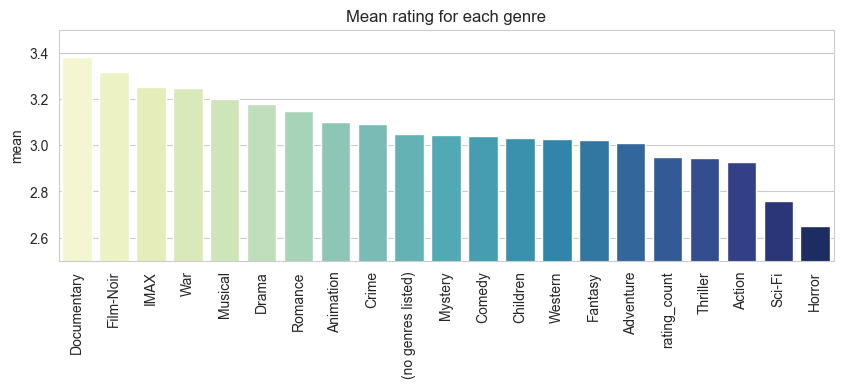

In [45]:
#mean rating for each genre
genres = movies_genres.columns[3:]
genres_mean = []
    
for genre in genres:
    genres_mean.append(movies_genres[movies_genres[genre] == 1]['rating'].mean())

genres_mean = pd.DataFrame(genres_mean, index=genres, columns=['mean'])
genres_mean.sort_values(by='mean', ascending=False, inplace=True)

#barplot of mean rating for each genre
plt.figure(figsize=(10, 3))
sns.barplot(x=genres_mean.index, y=genres_mean['mean'], palette='YlGnBu')
plt.ylim(2.5, 3.5)
plt.title('Mean rating for each genre')
plt.xticks(rotation=90)
plt.show()



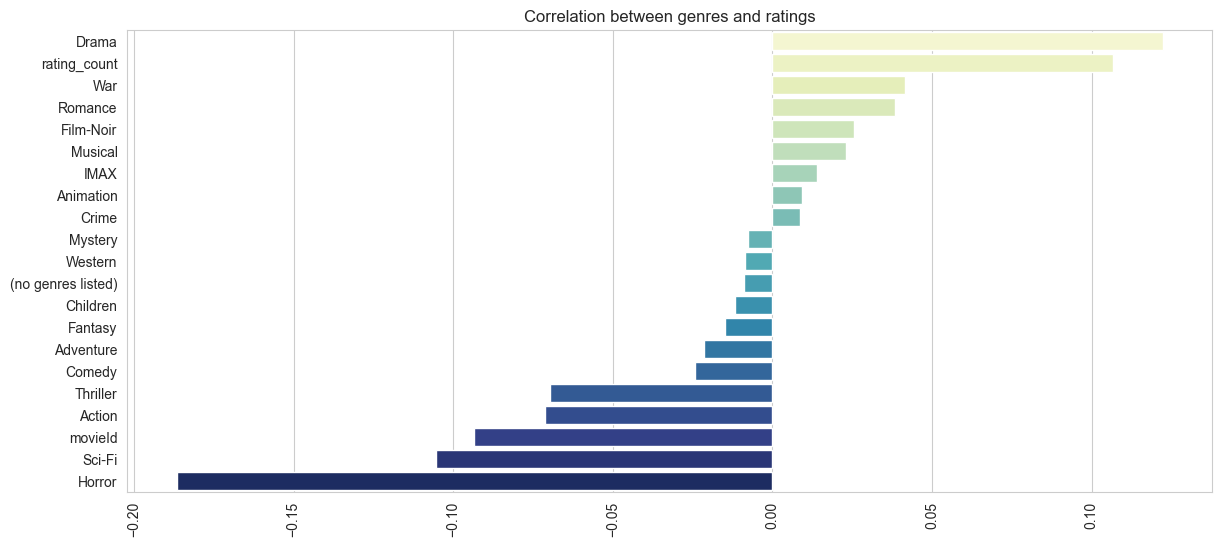

In [47]:
#calculate the correlation between genres and ratings

corr = movies_genres.corr(numeric_only=True)
corr = corr['rating'].sort_values(ascending=False)
corr = corr[2:]
#barplot of correlation between genres and ratings
plt.figure(figsize=(14, 6))
sns.barplot(x=corr.values, y=corr.index, palette='YlGnBu')
plt.title('Correlation between genres and ratings')
plt.xticks(rotation=90)
plt.show()


In [38]:
## Correlation between tags and ratings
# features correlation
corre = df.corr()
corre = corre['rating'].sort_values(ascending=False)
corre = corre.drop('rating')




C:\Users\franc\AppData\Local\Temp\ipykernel_2688\3156605354.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


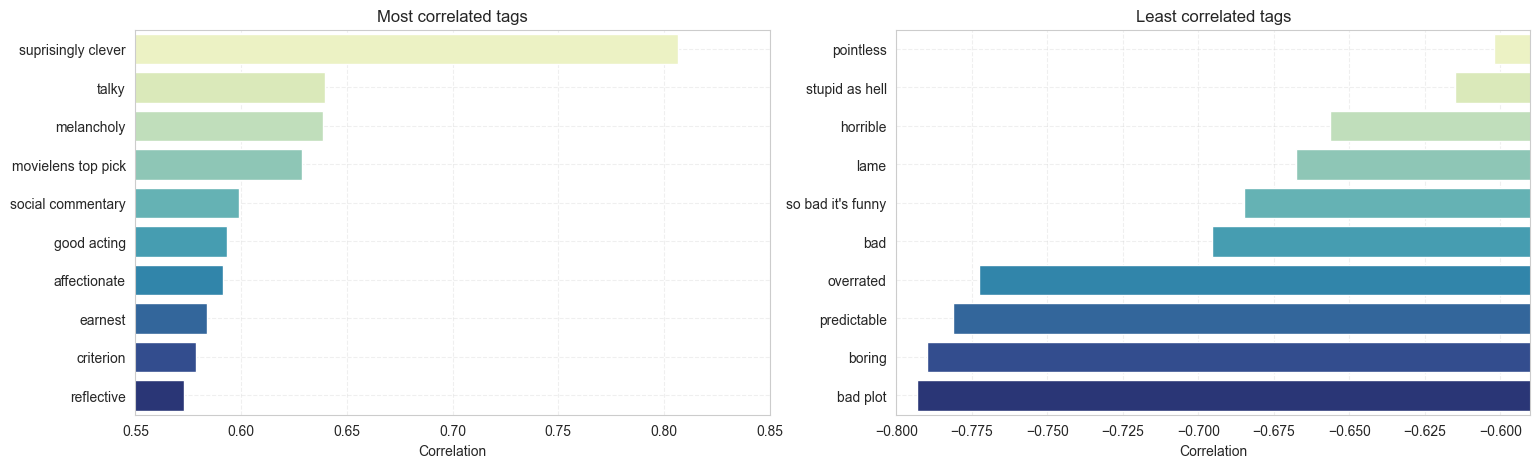

In [42]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=corre.values[:10], y=corre.index[:10], palette='YlGnBu', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Most correlated tags')
plt.xlabel('Correlation')
plt.xlim(0.55, 0.85)

plt.subplot(1, 2, 2)
sns.barplot(x=corre.values[-10:], y=corre.index[-10:], palette='YlGnBu', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Least correlated tags')
plt.xlabel('Correlation')
plt.xlim(-.8, -0.59)
plt.ylabel('')
plt.show()


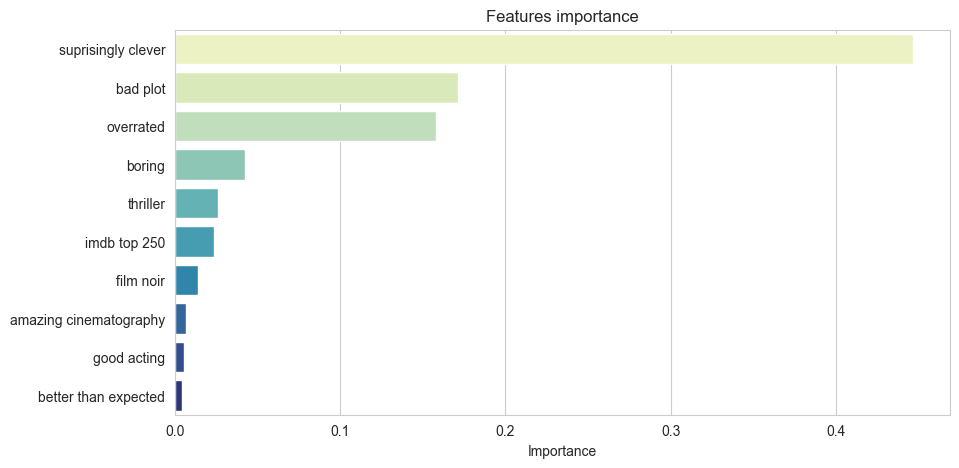

In [40]:
#calculate the features importance
from sklearn.ensemble import RandomForestRegressor

X = df.drop('rating', axis=1)
y = df['rating']

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]
# plot the features importance
plt.figure(figsize=(10, 5))
plt.title('Features importance')
sns.barplot(x=importance[indices], y=features, palette='YlGnBu')
plt.xlabel('Importance')
#plt.xlim([-1, X.shape[1]])
plt.show()


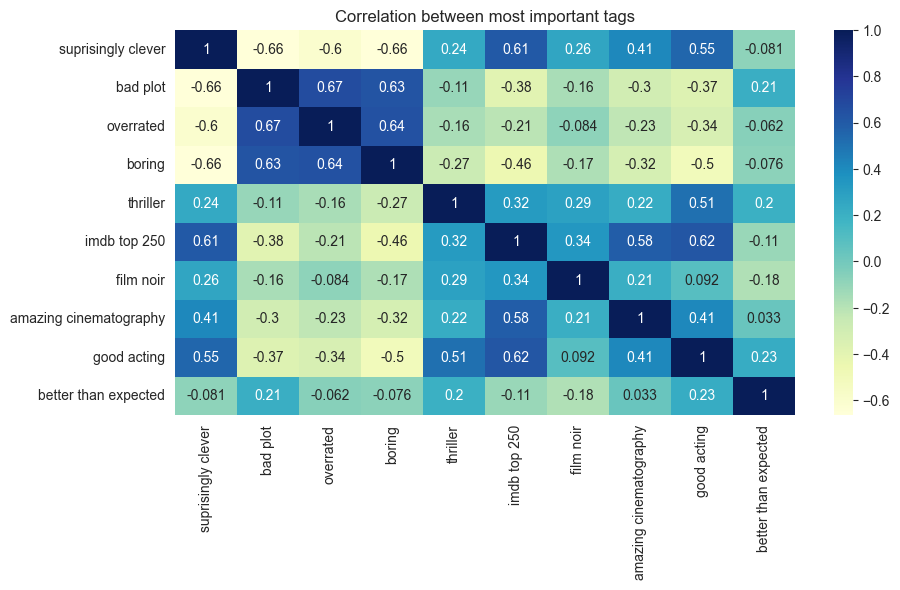

In [41]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between most important tags')
plt.show()